In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sbermarket_tab_2_1/tab_2_products_2020-01-01.csv')
df_tab = pd.read_csv('kaggle_tab_1345/tab_1_orders.csv')

In [3]:
df_tab4 = pd.read_csv('kaggle_tab_1345/tab_4_user_profiles.csv')

In [4]:
df_tab4.head(20)

,user_id,gender,bdate
0,2224890,NaN,NaN
1,1683001,male,1987-10-11
2,2102480,NaN,NaN
3,2224895,NaN,NaN
4,930197,NaN,NaN
5,2224898,NaN,NaN
6,2224901,NaN,NaN
7,354324,NaN,NaN
8,2224902,NaN,NaN
9,2224903,NaN,NaN


In [5]:
df_tab4 = df_tab4.dropna()

In [6]:
df_tab4

,user_id,gender,bdate
1,1683001,male,1987-10-11
10,1288925,male,1982-09-24
19,1914497,male,26.9.1983
22,631583,male,1989-03-16
41,2106256,male,1978-12-04
...,...,...,...
438862,3424212,female,1997-09-15
438863,3424222,male,1978-09-18
438864,3424225,female,1981-11-02
438865,3424228,female,1993-10-04


In [7]:
dates = np.array(df_tab4.bdate)

In [8]:
dates = [x.split('-') if '-' in x else x.split('.') for x in dates]
dates = [np.max([int(a) for a in x]) for x in dates]

In [9]:
df_tab4.bdate = dates

In [10]:
id_female = np.array(df_tab4[df_tab4.gender=='female'].user_id)
id_male = np.array(df_tab4[df_tab4.gender=='male'].user_id)

In [11]:
price = []
for id_ in tqdm(id_male):
    if id_ in np.array(df.user_id):
        local = df[df.user_id==id_]
        for order_id in np.array(local.order_id):
            local_order = local[local.order_id==order_id]
            price_local = np.sum(local_order.price)
            price.append(price_local)

100%|██████████| 76184/76184 [00:38<00:00, 1964.18it/s]


In [12]:
print('Male average basket price')
print('Median:', np.median(price))
print('Mean:', np.mean(price))

Male average basket price
Median: 3274.4799795150757
Mean: 4508.454845132964


In [13]:
price = []
for id_ in tqdm(id_female):
    if id_ in np.array(df.user_id):
        local = df[df.user_id==id_]
        for order_id in np.array(local.order_id):
            local_order = local[local.order_id==order_id]
            price_local = np.sum(local_order.price)
            price.append(price_local)

100%|██████████| 130744/130744 [01:07<00:00, 1941.09it/s]


In [14]:
print('Female average basket price')
print('Median:', np.median(price))
print('Mean:', np.mean(price))

Female average basket price
Median: 3621.090021133423
Mean: 4498.690869629303


In [15]:
age = 2020*np.ones(len(dates)) - np.array(dates)

In [16]:
age = age[age<120]
age = age[age>5]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1543870290>,
 'caps': [<matplotlib.lines.Line2D at 0x7f15438819d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1543870250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1543870f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1545f779d0>],
 'means': []}

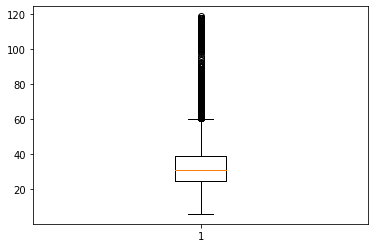

In [17]:
plt.boxplot(age)

In [18]:
#Introduce six groups of customers by age


young = age[age<12]
teens = age[[i for i,x in enumerate(age) if x in range(10,15)]]
adolescents = age[[i for i,x in enumerate(age) if x in range(16,21)]]
young_adults = age[[i for i,x in enumerate(age) if x in range(22,32)]]
adults = age[[i for i,x in enumerate(age) if x in range(33,50)]]
old = age[[i for i,x in enumerate(age) if x > 50]]

In [19]:
print(len(young))
print(len(teens))
print(len(adolescents))
print(len(young_adults))
print(len(adults))
print(len(old))

28
275
20543
76896
73345
18104


In [20]:
a = [len(young), len(teens), len(adolescents), len(young_adults), len(adults), len(old)]

In [21]:
names = ['<12', '12-15', '16-21', '22-33', '33-50', '50+']

Text(0.5, 1.0, 'Distribution of customers by age')

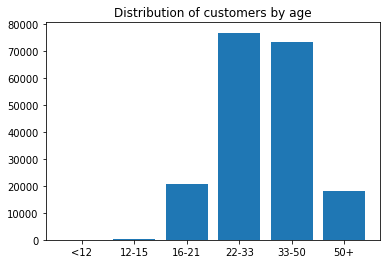

In [22]:
plt.bar(names, a)
plt.title('Distribution of customers by age')